# Porto Seguro's Safe Driver Prediction
- 목표: 고객들의 보험 청구 데이터를 바탕으로 내년에 고객이 보험 청구를 할 것인지 예측
- 평가지표: Normalized Gini Coefficient
- 데이터: 1,488,028개 (train: 595,212, test: 892,816)

### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\hands\\OneDrive\\바탕 화면\\Kaggle\\Porto_Seguro'

In [3]:
pd.set_option('display.max_columns',100)

### Loading Data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 1. 데이터 Overview

**<U>데이터 크기</U>**

In [5]:
print(train.shape)
train.head(3)

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


In [6]:
print(test.shape)
test.head(3)

(892816, 58)


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0


데이터에서 다음을 관찰할 수 있다. 
- train 데이터는 595,212개, test 데이터는 892,816개
- 총 57개의 독립변수(피쳐 중 id, target 제외)
- 각 컬럼명을 보면 bin, cat 등의 이름이 표기 됨 : 변수 종류들을 표기한 것으로 보임
- id에 대한 target 변수를 예측하는 것이 목표
- 범주형 변수가 정수값을 가짐
- 결측값은 -1로 처리됨

**<U>중복 행 체크</U>**

In [7]:
# Checking for dupliate rows
train.duplicated().any()

False

중복 데이터는 없는 것으로 보인다.

**<U>Datatype Check</U>**

In [8]:
from collections import Counter

In [9]:
Counter(train.dtypes)

Counter({dtype('int64'): 49, dtype('float64'): 10})

59개 피쳐의 데이터 종류를 보면 정수형이 49개, 실수형이 10개다.

## 2. Metadata

데이터 관리를 쉽게 할 수 있도록 각 변수에 대한 meta 정보가 들어간 데이터 프레임을 만들자. \
이는 나중에 데이터 분석 작업이나 EDA, 모델 구축 시 특정 피쳐들을 고를 때 유용하게 쓸 수 있을 것이다.\
\
Metadata 데이터프레임에 각 피쳐들에 대한 4개의 정보를 저장할 것 : 
- role(각 피쳐의 역할): input, ID, target 
- level(변수 종류): nominal, binary, ordinal, interval
- keep(사용여부): True, False
- dtype(데이터 종류): int, float, str

In [10]:
# create metadata dataframe
data = []

for col in train.columns:
    # role 정의
    if col == 'target':
        role = 'target'
    elif col == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level 정의
    if ('bin' in col)  | (col=='target'):
        level = 'binary'
    elif ('cat' in col) | (col=='id'):
        level = 'nominal'
    elif train[col].dtype == 'float64':
        level = 'interval'
    elif train[col].dtype == 'int64':
        level = 'ordinal'
        
    # id를 제외하고 모든 변수에 대해 'keep'으로 설정
    keep = True
    if col == 'id':
        keep = False
    
    # Defining the datatype
    dtype = train[col].dtype
    
    # 각 변수에 대한 metadata를 갖는 딕셔너리 
    f_dict = {
        'varname' : col,
        'role' : role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns = ['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

만든 metadata 데이터프레임을 보자.

In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


각 피쳐들의 변수 종류를 살펴보자.

In [12]:
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


독립변수들의 종류를 보면 
- binary : 17개
- interval: 10개
- nominal : 14개
- ordinal : 16개

## 3. Descriptive Statistics

describe 함수를 써서 각 변수들의 데이터 분표를 알아보자.

**<U>Interval Variables</U>**

In [13]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1) reg 변수들
- 결측값 있는 변수 : ps_reg_03
- 변수에 따라 데이터 range가 다른 것을 볼 수 있음
- 추후에 사용할 모델 종류에 따라서 scaling 처리를 하면 될 것으로 보임

2) car 변수들 
- 결측값 있는 변수 : ps_car_12, ps_car_14
- 이 변수들도 데이터 range가 변수마다 다르기 때문에 추후에 scaling 적용 고려

3) calc 변수들
- 결측값 있는 변수 : 없음
- ps_calc_01 ~ ps_calc03: 서로 유사한 분포 가짐, 모두 max값이 0.9인 것으로 보아 어떤 비율을 나타내는 것일 수 있음

전체적으로 보면, 구간 변수들은 range가 작다. 대회에서 데이터 익명처리를 위해 어떤 transformation을 적용한 것일 수 도 있을 것 같다.

**<U>Ordinal Variables</U>**

In [14]:
v = meta[(meta.level=='ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


1) car 변수들
- 결측값 있는 변수 : ps_car_11

**<U>Binary Variables</U>**

In [15]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1) target 변수
- 평균이 0.036448인 것으로 보아 매우 imbalance한 데이터인 것으로 보임
- 즉, 대부분의 target 값이 0일 것

## 4. Imbalance 데이터 처리

매우 imbalance한 데이터이기 때문에 target이 1인 케이스가 0인 케이스보다 훨씬 적을 것으로 보인다. \
Oversampling과 undersampling이 있을텐데, oversampling의 경우 모델이 train셋에 있는 minority class에 과적합되어 test셋에서는 성능을 발휘하지 못할 가능성이 있기 때문에 undersampling을 사용하겠다.

### Undersampling

In [16]:
ratio = 0.1

# 각 target값을 가지는 index 저장
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# 각 target값을 가지는 데이터 수 저장
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# undersampling rate을 계산하고 적용시 target=0인 데이터 수 구함
undersampling_rate = ((1-ratio)*nb_1)/(nb_0*ratio)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print(undersampling_rate)
print(undersampled_nb_0)

0.34043569687437886
195246


In [17]:
from sklearn.utils import shuffle

# target=0인 데이터들을 위에서 구한 undersampling 데이터 수만큼 랜덤하게 추출
undersampled_idx = shuffle(idx_0, random_state=17, n_samples = undersampled_nb_0)

# target=1인 index들과 병합
idx_list = list(undersampled_idx) + list(idx_1)

# 최종 undersampled dataframe 생성
train = train.loc[idx_list].reset_index(drop=True)

## 5. 데이터 Quality Check

**<U>결측값 체크</U>**

In [18]:
vars_with_na = []

for col in train.columns:
    missings = train[train[col]==-1][col].count()
    if missings > 0:
        vars_with_na.append(col)
        missings_percent = missings/train.shape[0]
        
        print('Column {} has {} records ({:.2%}) with NA' .format(col,missings,missings_percent))
        
print("In total: there are {} variables with NA" .format(len(vars_with_na)))

Column ps_ind_02_cat has 98 records (0.05%) with NA
Column ps_ind_04_cat has 53 records (0.02%) with NA
Column ps_ind_05_cat has 2343 records (1.08%) with NA
Column ps_reg_03 has 38512 records (17.75%) with NA
Column ps_car_01_cat has 59 records (0.03%) with NA
Column ps_car_02_cat has 1 records (0.00%) with NA
Column ps_car_03_cat has 148709 records (68.55%) with NA
Column ps_car_05_cat has 96369 records (44.42%) with NA
Column ps_car_07_cat has 4510 records (2.08%) with NA
Column ps_car_09_cat has 229 records (0.11%) with NA
Column ps_car_11 has 1 records (0.00%) with NA
Column ps_car_14 has 15537 records (7.16%) with NA
In total: there are 12 variables with NA


- ['ps_car_03_cat','ps_car_05_cat']: NA 비율이 매우 커서 제거 예정
- ['ps_reg_03'] (연속형 변수): mean 값으로 대체
- ['ps_car_11'] (순서형 변수): mode 값으로 대체
- ['ps_car_14'] (연속형 변수): mean 값으로 대체
- 나머지 범주형 변수들의 결측값들은 -1로 유지

**<U>범주형 변수 차원 체크</U>**

범주형 변수들을 어떻게 처리할지 정하기 위해 각 변수들이 몇 개의 unique한 값들이 있는지 체크하자.

In [19]:
v = meta[(meta.level=='nominal') & (meta.keep)].index

for col in v:
    unique_values = train[col].value_counts().shape[0]
    print('Variable {} has {} distinct values' .format(col, unique_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat 이 무려 104개의 unique한 값들을 갖고있다.
- 만약 이 변수에 one-hot-encoding을 적용하면 차원이 매우 커질 것이므로 target-based encoding을 사용하자.

In [20]:
# target-based encoding
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # target mean 계산 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # 모든 target data의 평균 계산
    prior = target.mean()
    
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # trn, tst series mean값 계산
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # index 복구
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # metadata 업데이트
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## 6. Exploratory Data Visualization

**<U>Categorical Variables</U>**

- 범주형 변수들을 시각화해서 target=1인 데이터의 분포를 살펴보자. 

<Figure size 432x288 with 0 Axes>

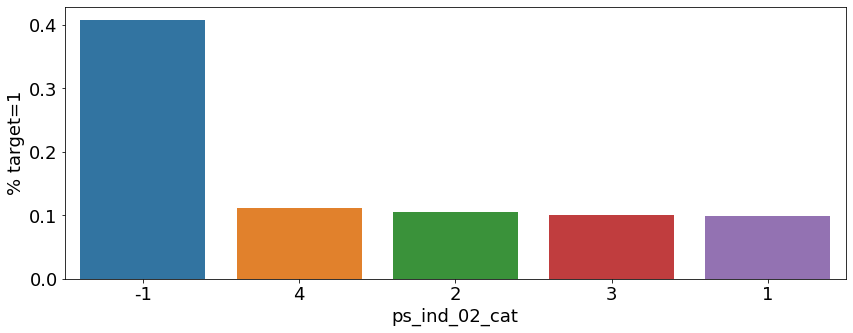

<Figure size 432x288 with 0 Axes>

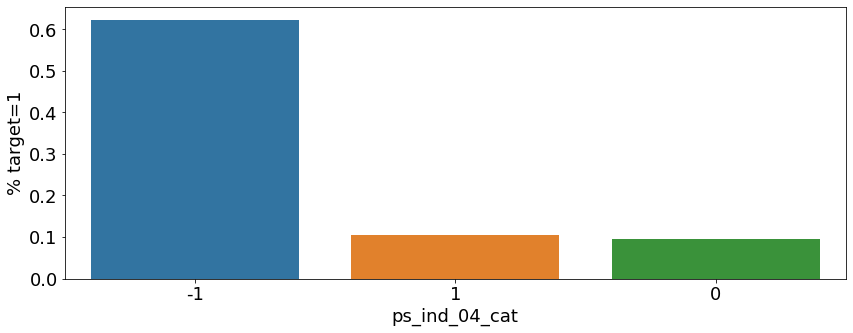

<Figure size 432x288 with 0 Axes>

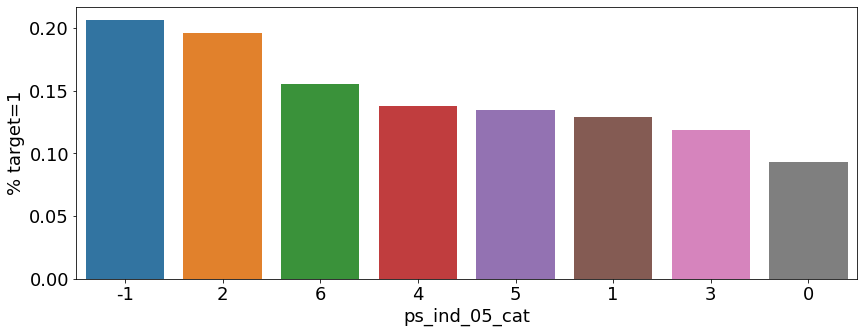

<Figure size 432x288 with 0 Axes>

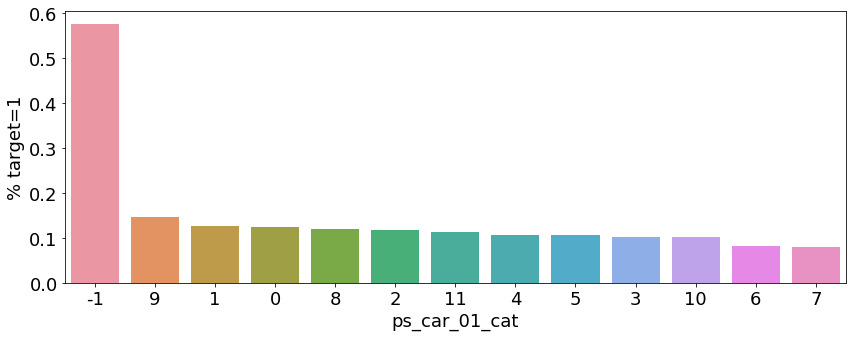

<Figure size 432x288 with 0 Axes>

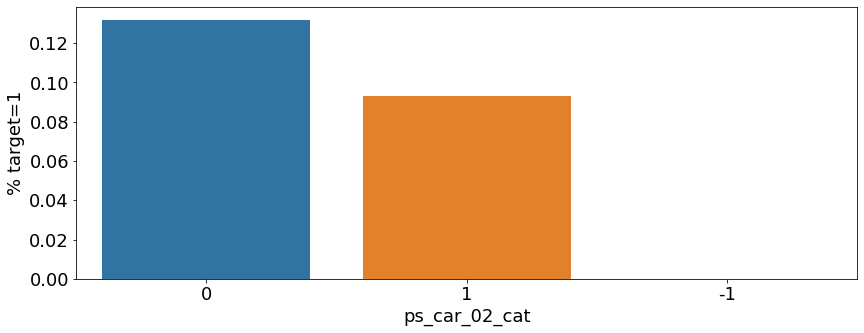

<Figure size 432x288 with 0 Axes>

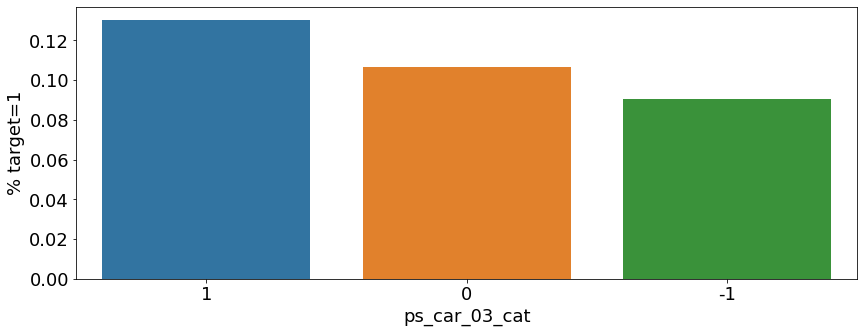

<Figure size 432x288 with 0 Axes>

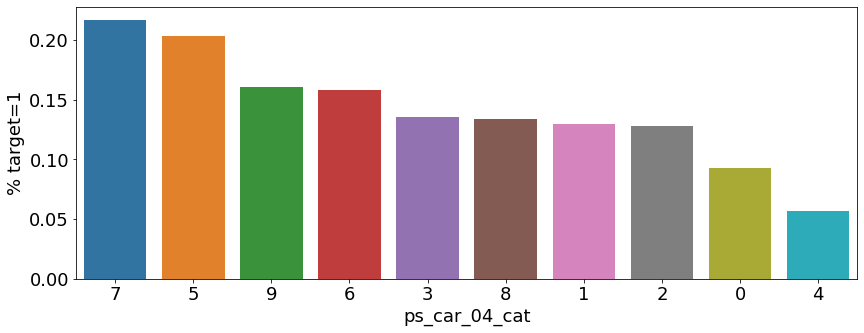

<Figure size 432x288 with 0 Axes>

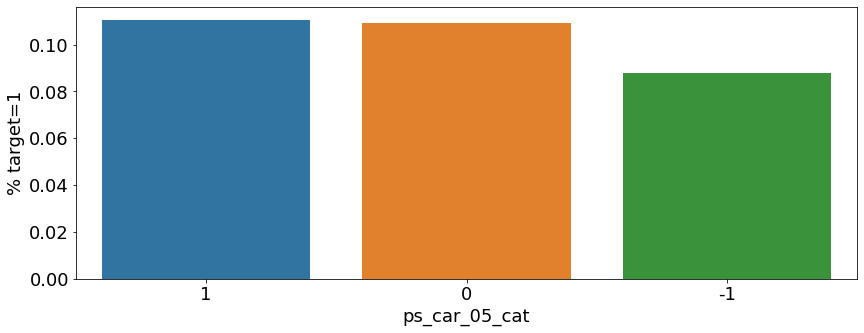

<Figure size 432x288 with 0 Axes>

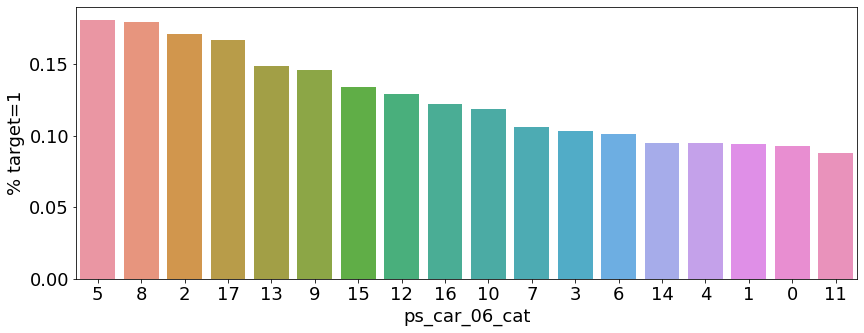

<Figure size 432x288 with 0 Axes>

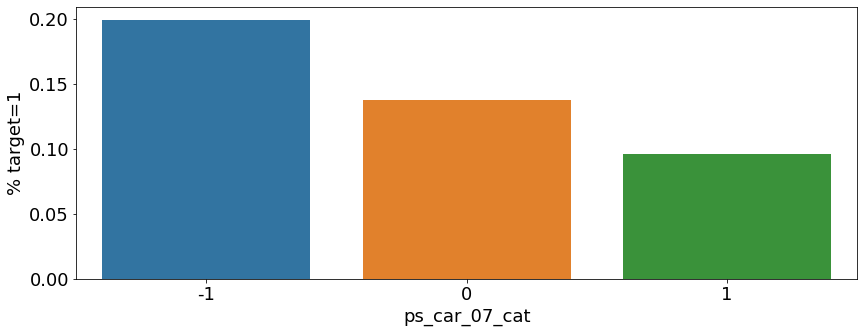

<Figure size 432x288 with 0 Axes>

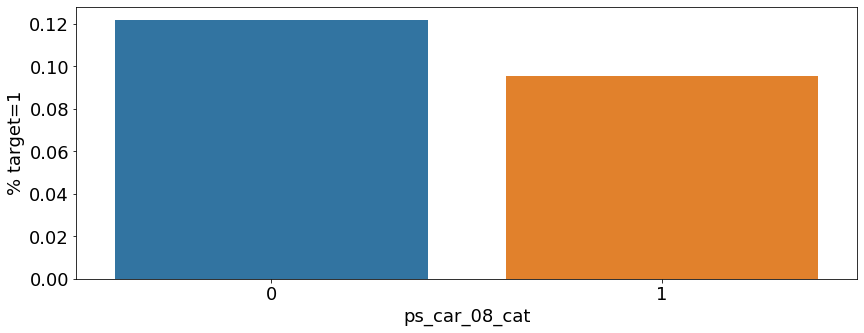

<Figure size 432x288 with 0 Axes>

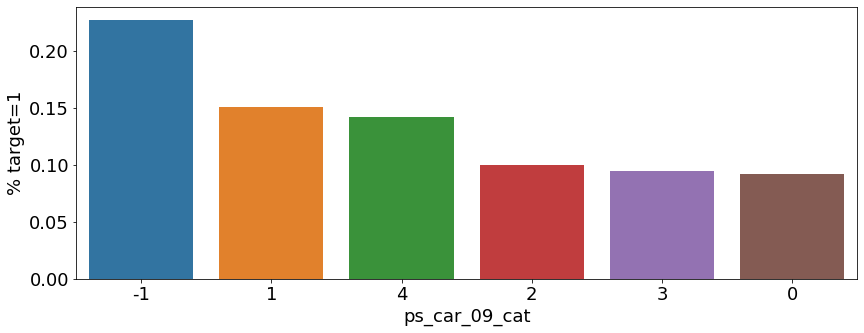

<Figure size 432x288 with 0 Axes>

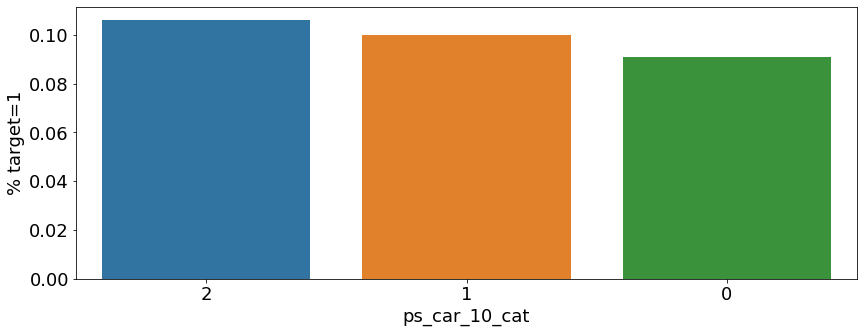

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for col in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(14,5))
    
    # 각 변수 값마다 target=1 비율 구하기
    cat_percent = train[[col,'target']].groupby([col], as_index=False).mean()
    cat_percent.sort_values(by='target',ascending=False,inplace=True)
    
    # Bar Plot
    sns.barplot(ax=ax, x=col, y='target', data=cat_percent, order=cat_percent[col])
    plt.ylabel('% target=1',fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.tick_params(axis='both',which='major',labelsize=18)
    plt.show()

target=1인 데이터의 분포를 보니 결측값이 매우 많거나 매우 적다는 것을 볼 수 있다. 즉, 만약 결측값들이 매우 많거나 적으면 보험 청구를 할 경향이 높다고 볼 수 있으므로, 결측값들을 다른 값으로 대체하는 것 보다 하나의 값으로 구분하는 것이 좋을 것 같다.

**<U>Interval Variables</U>**

각 구간 변수들의 상관성을 알아보자.

In [23]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidths=.5, annot=True, cbar_kws = {"shrink": .75})

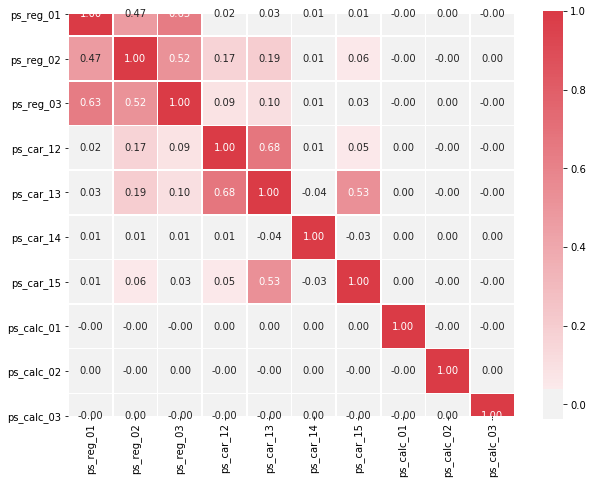

In [24]:
v = meta[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(v)

다음 변수들이 높은 상관성을 보임 :

- ps_car_12 & ps_car_13 (0.68)
- ps_reg_01 & ps_reg_03 (0.63)
- ps_reg_02 & ps_reg_03 (0.52)
- ps_car_15 & ps_car_13 (0.53)

상관성 높은 변수 pair들을 자세히 알아보자.

**1) ps_car_12 & ps_car_13**

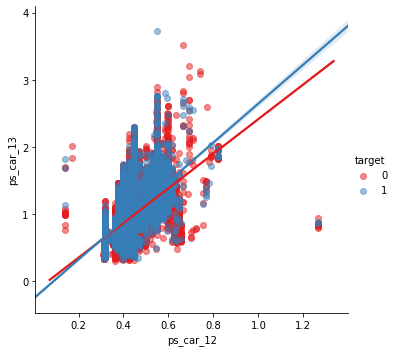

In [25]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train, hue='target',palette='Set1',scatter_kws={'alpha': 0.5})

**2) ps_reg_01 & ps_reg_03**

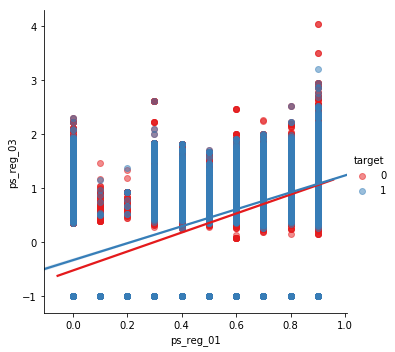

In [39]:
sns.lmplot(x='ps_reg_01', y='ps_reg_03', data=train, hue='target',palette='Set1',scatter_kws={'alpha': 0.5})

**3) ps_reg_02 a& ps_reg_03**

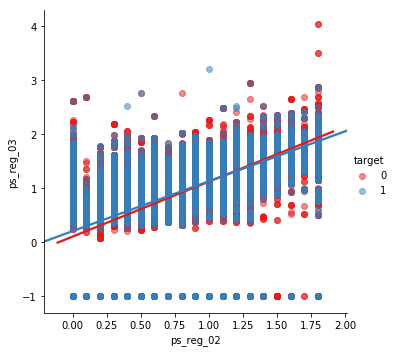

In [40]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train, hue='target',palette='Set1',scatter_kws={'alpha': 0.5})

**4) ps_car_15 & ps_car_13**

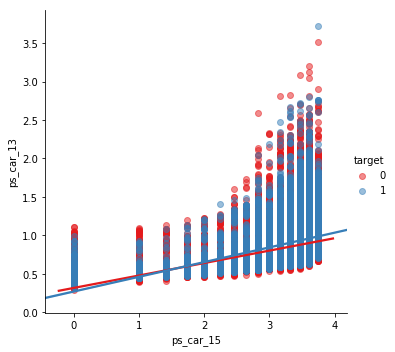

In [42]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=train, hue='target',palette='Set1',scatter_kws={'alpha': 0.5})

이 중 어떤 변수들을 keep 해야할까? \
\
PCA로 몇 개의 변수들을 유지해야 되는지 알아보자.

Alright, so how do we decide which of the correlated variables to keep? We could perform PCA on the variables to reduce the dimensions. 

**5) PCA**

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

PCA를 하기 전에 숫자형 변수들을 standardize 하자.

In [27]:
sc = StandardScaler()

corrFeatures = ['ps_car_12', 'ps_car_13','ps_reg_01','ps_reg_03', 'ps_reg_02','ps_car_15']
train_corr_std = sc.fit_transform(train[corrFeatures])

In [28]:
pca = PCA(n_components = None)

train_corr_pca = pca.fit_transform(train_corr_std)
varExp = pca.explained_variance_ratio_

In [29]:
cumVarExplained = []
nb_components = []
counter = 1

for i in varExp:
    cumVarExplained.append(varExp[:counter].sum())
    nb_components.append(counter)
    counter += 1

Plot the cumulative explained variance as a function of the number of components.

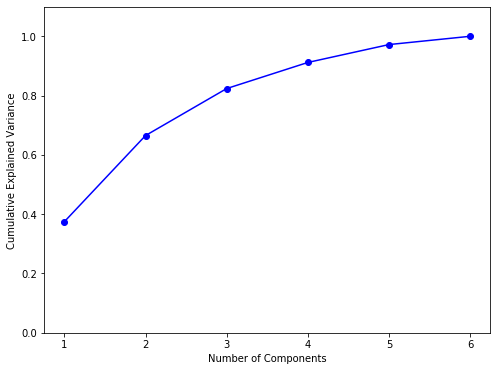

In [30]:
plt.subplots(figsize=(8,6))
plt.plot(nb_components, cumVarExplained, 'bo-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylim([0.0, 1.1])
plt.show()

위 누적 기여율 그래프를 보면, 주성분 수가 4개일때 분산의 90% 이상을 설명하는 것을 확인할 수 있다. 따라서 숫자형 변수들을 4개로 줄여도 될 것으로 보인다.

**<U>Ordinal Variables</U>**

순서형 변수의 상관성을 살펴보자.

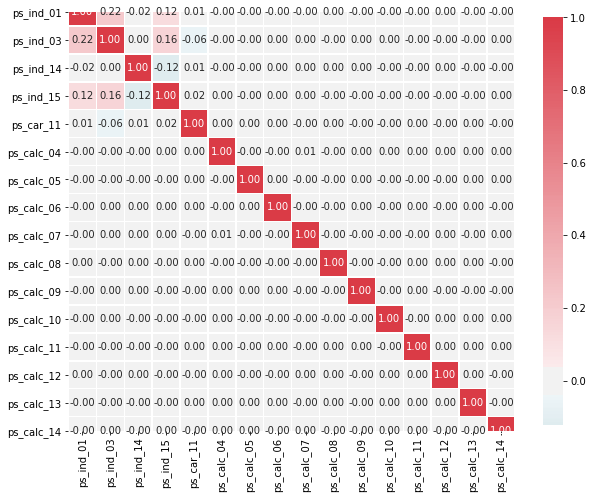

In [31]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수에서는 상관성이 별로 관찰되지 않는다.

- In ordinal variables, we don't see many correlations. We could, on the other hand, look at how the distributions are when grouped by the target value.

## 7. Feature Engineering

In [64]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,576589,0,4,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,0.3,0.664267,9,0,-1,0,-1,11,0,0,2,1,2,0.424264,1.031097,-1.000000,3.741657,0.9,0.4,0.9,3,2,8,4,9,0,5,3,1,4,4,0,1,1,1,1,0,0.124074
1,447775,0,0,1,0,0,-1,1,0,0,0,0,0,0,0,0,7,1,0,0,0.4,0.0,0.540833,7,1,0,0,0,11,-1,1,0,1,1,0.316228,0.640425,0.288791,3.464102,0.5,0.9,0.2,2,2,8,4,10,4,9,8,1,1,5,0,1,1,0,0,0,0.073340
2,63685,0,2,1,2,1,0,0,0,1,0,0,0,0,0,0,12,0,1,0,0.4,0.6,0.751249,11,1,-1,0,-1,11,1,1,2,1,2,0.374166,0.738087,0.366606,3.464102,0.1,0.4,0.1,3,4,10,3,8,1,6,6,1,6,5,0,1,0,0,1,0,0.075416
3,18938,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.6,0.996557,10,1,-1,0,1,15,1,0,0,1,2,0.387298,0.902991,-1.000000,3.741657,0.4,0.1,0.8,2,2,10,2,11,4,3,7,2,3,8,0,0,1,0,1,0,0.158431
4,692473,0,5,1,5,0,0,0,1,0,0,0,0,0,0,0,5,0,1,0,0.0,0.0,-1.000000,9,1,-1,2,-1,1,0,1,2,1,0,0.374166,0.842088,0.418927,3.316625,0.4,0.9,0.2,1,1,4,1,9,1,5,5,6,2,11,0,1,1,0,1,0,0.108852


**<U>Interaction 변수 생성</U>**

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
v = meta[(meta.level=='interval') & (meta.keep)].index

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [34]:
interactions = pd.DataFrame(data = poly.fit_transform(train[v]), columns=poly.get_feature_names(v))

In [35]:
interactions_test = pd.DataFrame(data = poly.fit_transform(test[v]), columns=poly.get_feature_names(v))

In [36]:
print(interactions.shape)
interactions.head()

(216940, 65)


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.9,0.3,0.664267,0.424264,1.031097,-1.000000,3.741657,0.9,0.4,0.9,0.81,0.27,0.597840,0.381838,0.927987,-0.900000,3.367492,0.81,0.36,0.81,0.09,0.199280,0.127279,0.309329,-0.300000,1.122497,0.27,0.12,0.27,0.441250,0.281824,0.684923,-0.664267,2.485458,0.597840,0.265707,0.597840,0.18,0.437457,-0.424264,1.587451,0.381838,0.169706,0.381838,1.063161,-1.031097,3.858012,0.927987,0.412439,0.927987,1.0000,-3.741657,-0.900000,-0.400000,-0.900000,14.0,3.367492,1.496663,3.367492,0.81,0.36,0.81,0.16,0.36,0.81
1,0.4,0.0,0.540833,0.316228,0.640425,0.288791,3.464102,0.5,0.9,0.2,0.16,0.00,0.216333,0.126491,0.256170,0.115516,1.385641,0.20,0.36,0.08,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.292500,0.171026,0.346363,0.156187,1.873499,0.270416,0.486749,0.108167,0.10,0.202520,0.091324,1.095445,0.158114,0.284605,0.063246,0.410145,0.184949,2.218498,0.320213,0.576383,0.128085,0.0834,1.000400,0.144395,0.259912,0.057758,12.0,1.732051,3.117691,0.692820,0.25,0.45,0.10,0.81,0.18,0.04
2,0.4,0.6,0.751249,0.374166,0.738087,0.366606,3.464102,0.1,0.4,0.1,0.16,0.24,0.300500,0.149666,0.295235,0.146642,1.385641,0.04,0.16,0.04,0.36,0.450749,0.224499,0.442852,0.219964,2.078461,0.06,0.24,0.06,0.564375,0.281092,0.554487,0.275412,2.602403,0.075125,0.300500,0.075125,0.14,0.276167,0.137171,1.296148,0.037417,0.149666,0.037417,0.544773,0.270587,2.556809,0.073809,0.295235,0.073809,0.1344,1.269961,0.036661,0.146642,0.036661,12.0,0.346410,1.385641,0.346410,0.01,0.04,0.01,0.16,0.04,0.01
3,0.9,0.6,0.996557,0.387298,0.902991,-1.000000,3.741657,0.4,0.1,0.8,0.81,0.54,0.896901,0.348569,0.812692,-0.900000,3.367492,0.36,0.09,0.72,0.36,0.597934,0.232379,0.541795,-0.600000,2.244994,0.24,0.06,0.48,0.993125,0.385965,0.899882,-0.996557,3.728773,0.398623,0.099656,0.797245,0.15,0.349727,-0.387298,1.449138,0.154919,0.038730,0.309839,0.815393,-0.902991,3.378683,0.361196,0.090299,0.722393,1.0000,-3.741657,-0.400000,-0.100000,-0.800000,14.0,1.496663,0.374166,2.993326,0.16,0.04,0.32,0.01,0.08,0.64
4,0.0,0.0,-1.000000,0.374166,0.842088,0.418927,3.316625,0.4,0.9,0.2,0.00,0.00,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,1.000000,-0.374166,-0.842088,-0.418927,-3.316625,-0.400000,-0.900000,-0.200000,0.14,0.315080,0.156748,1.240967,0.149666,0.336749,0.074833,0.709112,0.352773,2.792889,0.336835,0.757879,0.168418,0.1755,1.389424,0.167571,0.377034,0.083785,11.0,1.326650,2.984962,0.663325,0.16,0.36,0.08,0.81,0.18,0.04


In [37]:
print(interactions_test.shape)
interactions_test.head()

(892816, 65)


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.5,0.3,0.610328,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,0.25,0.15,0.305164,0.158114,0.334778,0.176068,1.732051,0.05,0.40,0.30,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.03,0.24,0.18,0.372500,0.193003,0.408649,0.214919,2.114237,0.061033,0.488262,0.366197,0.10,0.211732,0.111355,1.095445,0.031623,0.252982,0.189737,0.448306,0.235775,2.319411,0.066956,0.535645,0.401734,0.1240,1.219836,0.035214,0.281709,0.211282,12.0,0.346410,2.771281,2.078461,0.01,0.08,0.06,0.64,0.48,0.36
1,0.9,0.5,0.771362,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,0.81,0.45,0.694226,0.284605,0.545688,0.322497,2.545584,0.36,0.45,0.36,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.20,0.25,0.20,0.595000,0.243926,0.467692,0.276402,2.181742,0.308545,0.385681,0.308545,0.10,0.191735,0.113314,0.894427,0.126491,0.158114,0.126491,0.367624,0.217262,1.714932,0.242528,0.303160,0.242528,0.1284,1.013509,0.143332,0.179165,0.143332,8.0,1.131371,1.414214,1.131371,0.16,0.20,0.16,0.25,0.20,0.16
2,0.4,0.0,0.916174,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,0.16,0.00,0.366470,0.160000,0.358495,0.159399,1.326650,0.24,0.24,0.24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.839375,0.366470,0.821111,0.365093,3.038606,0.549704,0.549704,0.549704,0.16,0.358495,0.159399,1.326650,0.240000,0.240000,0.240000,0.803244,0.357149,2.972487,0.537743,0.537743,0.537743,0.1588,1.321666,0.239098,0.239098,0.239098,11.0,1.989975,1.989975,1.989975,0.36,0.36,0.36,0.36,0.36,0.36
3,0.1,0.2,-1.000000,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,0.01,0.02,-0.100000,0.037417,0.065211,0.038144,0.244949,0.01,0.05,0.05,0.04,-0.200000,0.074833,0.130422,0.076289,0.489898,0.02,0.10,0.10,1.000000,-0.374166,-0.652110,-0.381445,-2.449490,-0.100000,-0.500000,-0.500000,0.14,0.243997,0.142724,0.916515,0.037417,0.187083,0.187083,0.425248,0.248744,1.597338,0.065211,0.326055,0.326055,0.1455,0.934345,0.038144,0.190722,0.190722,6.0,0.244949,1.224745,1.224745,0.01,0.05,0.05,0.25,0.25,0.25
4,0.9,0.4,0.817771,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,0.81,0.36,0.735994,0.336749,0.731623,0.346588,2.984962,0.81,0.54,0.72,0.16,0.327109,0.149666,0.325166,0.154039,1.326650,0.36,0.24,0.32,0.668750,0.305982,0.664778,0.314922,2.712241,0.735994,0.490663,0.654217,0.14,0.304165,0.144090,1.240967,0.336749,0.224499,0.299333,0.660830,0.313051,2.696132,0.731623,0.487749,0.650331,0.1483,1.277224,0.346588,0.231058,0.308078,11.0,2.984962,1.989975,2.653300,0.81,0.54,0.72,0.36,0.48,0.64


In [38]:
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [39]:
interactions.drop(v,axis=1,inplace=True)
interactions_test.drop(v, axis=1, inplace=True)

In [40]:
train = pd.concat([train,interactions],axis=1)
test = pd.concat([test,interactions_test],axis=1)

In [41]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,576589,0,4,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,0.3,0.664267,9,0,-1,0,-1,11,0,0,2,1,2,0.424264,1.031097,-1.000000,3.741657,0.9,0.4,0.9,3,2,8,4,9,0,5,3,1,...,-0.900000,3.367492,0.81,0.36,0.81,0.09,0.199280,0.127279,0.309329,-0.300000,1.122497,0.27,0.12,0.27,0.441250,0.281824,0.684923,-0.664267,2.485458,0.597840,0.265707,0.597840,0.18,0.437457,-0.424264,1.587451,0.381838,0.169706,0.381838,1.063161,-1.031097,3.858012,0.927987,0.412439,0.927987,1.0000,-3.741657,-0.900000,-0.400000,-0.900000,14.0,3.367492,1.496663,3.367492,0.81,0.36,0.81,0.16,0.36,0.81
1,447775,0,0,1,0,0,-1,1,0,0,0,0,0,0,0,0,7,1,0,0,0.4,0.0,0.540833,7,1,0,0,0,11,-1,1,0,1,1,0.316228,0.640425,0.288791,3.464102,0.5,0.9,0.2,2,2,8,4,10,4,9,8,1,...,0.115516,1.385641,0.20,0.36,0.08,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.292500,0.171026,0.346363,0.156187,1.873499,0.270416,0.486749,0.108167,0.10,0.202520,0.091324,1.095445,0.158114,0.284605,0.063246,0.410145,0.184949,2.218498,0.320213,0.576383,0.128085,0.0834,1.000400,0.144395,0.259912,0.057758,12.0,1.732051,3.117691,0.692820,0.25,0.45,0.10,0.81,0.18,0.04
2,63685,0,2,1,2,1,0,0,0,1,0,0,0,0,0,0,12,0,1,0,0.4,0.6,0.751249,11,1,-1,0,-1,11,1,1,2,1,2,0.374166,0.738087,0.366606,3.464102,0.1,0.4,0.1,3,4,10,3,8,1,6,6,1,...,0.146642,1.385641,0.04,0.16,0.04,0.36,0.450749,0.224499,0.442852,0.219964,2.078461,0.06,0.24,0.06,0.564375,0.281092,0.554487,0.275412,2.602403,0.075125,0.300500,0.075125,0.14,0.276167,0.137171,1.296148,0.037417,0.149666,0.037417,0.544773,0.270587,2.556809,0.073809,0.295235,0.073809,0.1344,1.269961,0.036661,0.146642,0.036661,12.0,0.346410,1.385641,0.346410,0.01,0.04,0.01,0.16,0.04,0.01
3,18938,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.6,0.996557,10,1,-1,0,1,15,1,0,0,1,2,0.387298,0.902991,-1.000000,3.741657,0.4,0.1,0.8,2,2,10,2,11,4,3,7,2,...,-0.900000,3.367492,0.36,0.09,0.72,0.36,0.597934,0.232379,0.541795,-0.600000,2.244994,0.24,0.06,0.48,0.993125,0.385965,0.899882,-0.996557,3.728773,0.398623,0.099656,0.797245,0.15,0.349727,-0.387298,1.449138,0.154919,0.038730,0.309839,0.815393,-0.902991,3.378683,0.361196,0.090299,0.722393,1.0000,-3.741657,-0.400000,-0.100000,-0.800000,14.0,1.496663,0.374166,2.993326,0.16,0.04,0.32,0.01,0.08,0.64
4,692473,0,5,1,5,0,0,0,1,0,0,0,0,0,0,0,5,0,1,0,0.0,0.0,-1.000000,9,1,-1,2,-1,1,0,1,2,1,0,0.374166,0.842088,0.418927,3.316625,0.4,0.9,0.2,1,1,4,1,9,1,5,5,6,...,0.000000,0.000000,0.00,0.00,0.00,0.00,-0.000000,0.000000,0.000000,0.

In [42]:
test.head(3)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,...,0.176068,1.732051,0.05,0.40,0.30,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.03,0.24,0.18,0.372500,0.193003,0.408649,0.214919,2.114237,0.061033,0.488262,0.366197,0.10,0.211732,0.111355,1.095445,0.031623,0.252982,0.189737,0.448306,0.235775,2.319411,0.066956,0.535645,0.401734,0.1240,1.219836,0.035214,0.281709,0.211282,12.0,0.346410,2.771281,2.078461,0.01,0.08,0.06,0.64,0.48,0.36
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,...,0.322497,2.545584,0.36,0.45,0.36,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.20,0.25,0.20,0.595000,0.243926,0.467692,0.276402,2.181742,0.308545,0.385681,0.308545,0.10,0.191735,0.113314,0.894427,0.126491,0.158114,0.126491,0.367624,0.217262,1.714932,0.242528,0.303160,0.242528,0.1284,1.013509,0.143332,0.179165,0.143332,8.0,1.131371,1.414214,1.131371,0.16,0.20,0.16,0.25,0.20,0.16
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,...,0.159399,1.326650,0.24,0.24,0.24,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.839375,0.366470,0.821111,0.365093,3.038606,0.549704,0.549704,0.549704,0.16,0.358495,0.159399,1.326650,0.240000,0.240000,0.240000,0.803244,0.357149,2.972487,0.537743,0.537743,0.537743,0.1588,1.321666,0.239098,0.239098,0.239098,11.0,1.989975,1.989975,1.989975,0.36,0.36,0.36,0.36,0.36,0.36


## 8. Feature Selection

**<U>분산이 매우 낮거나 0인 변수 삭제</U>**

보통, 알고리즘이 어떤 변수를 keep할지 정하는게 가장 좋은데, 그 전에 분산이 매우 낮거나 0인 변수들을 먼저 체크해서 삭제해도 되는지 알아보자. Sklearn의 Variance Threshold 함수를 사용해서 분산이 0.01 이하인 변수들의 개수를 알아보자.

Personally, I prefer to let the classifier algorithm choose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: **Variance Threshold**. By default, it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero variance variables in the previous steps. However, if we remove features with less than 1% variance, we would remove 31 variables.

In [43]:
from sklearn.feature_selection import VarianceThreshold

In [44]:
selector = VarianceThreshold(threshold = 0.01)

In [45]:
selector.fit(train.drop(['id','target'],axis=1))

VarianceThreshold(threshold=0.01)

In [46]:
# boolean 값들 반대로 바꿔주기
f = np.vectorize(lambda x : not x)

In [51]:
f(selector.get_support())

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [52]:
v = train.drop(['id','target'], axis=1).columns[f(selector.get_support())]

In [56]:
print('{} variables have really low variance' .format(len(v)))
print('These variables are {}' .format(list(v)))

8 variables have really low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_11_cat_te', 'ps_car_12^2']


현재 데이터에는 변수가 몇 개 없기 때문에 만약 분산을 기준으로 잡고 위에서 구한 것처럼 8개의 변수를 삭제한다면 많은 정보를 잃어버리게 될 것 같다. 따라서 분산을 기준으로 사용하지 말고 classifier의 feature selection 방법을 사용하자.

**<U>Random Forest를 사용한 feature selection</U>**

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

Random Forest 알고리즘을 사용해서 각 피쳐의 중요도를 계산하고, 그에 따라 feature selection을 하자.

In [58]:
X_train = train.drop(['id','target'],axis=1)
y_train = train['target']

feat_labels = X_train.columns
rf = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
importances = rf.feature_importances_

In [60]:
indices = np.argsort(rf.feature_importances_)[::-1]

In [39]:
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, feat_labels[indices[i]], importances[indices[i]]))

 1) ps_car_11_cat_te               0.022618
 2) ps_reg_03 ps_car_13            0.018218
 3) ps_car_13^2                    0.017897
 4) ps_car_12 ps_car_13            0.017795
 5) ps_car_13                      0.017779
 6) ps_reg_01 ps_car_13            0.017308
 7) ps_car_13 ps_car_15            0.017184
 8) ps_car_13 ps_car_14            0.017108
 9) ps_reg_03 ps_car_14            0.016066
10) ps_reg_03 ps_car_15            0.015909
11) ps_reg_03 ps_car_12            0.015890
12) ps_car_13 ps_calc_01           0.015210
13) ps_car_13 ps_calc_03           0.015169
14) ps_car_13 ps_calc_02           0.015110
15) ps_reg_02 ps_car_13            0.014912
16) ps_reg_01 ps_reg_03            0.014896
17) ps_car_14 ps_car_15            0.014593
18) ps_reg_03^2                    0.014538
19) ps_calc_10                     0.014349
20) ps_reg_03 ps_calc_03           0.014254
21) ps_reg_03 ps_calc_02           0.014230
22) ps_reg_03 ps_calc_01           0.014176
23) ps_calc_14                  

## Split Dataset

In [61]:
x_test = test.drop(['id'],axis=1)

In [62]:
X_train.head(2)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,4,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,0.3,0.664267,9,0,-1,0,-1,11,0,0,2,1,2,0.424264,1.031097,-1.000000,3.741657,0.9,0.4,0.9,3,2,8,4,9,0,5,3,1,4,4,...,-0.900000,3.367492,0.81,0.36,0.81,0.09,0.19928,0.127279,0.309329,-0.3,1.122497,0.27,0.12,0.27,0.44125,0.281824,0.684923,-0.664267,2.485458,0.597840,0.265707,0.597840,0.18,0.437457,-0.424264,1.587451,0.381838,0.169706,0.381838,1.063161,-1.031097,3.858012,0.927987,0.412439,0.927987,1.0000,-3.741657,-0.900000,-0.400000,-0.900000,14.0,3.367492,1.496663,3.367492,0.81,0.36,0.81,0.16,0.36,0.81
1,0,1,0,0,-1,1,0,0,0,0,0,0,0,0,7,1,0,0,0.4,0.0,0.540833,7,1,0,0,0,11,-1,1,0,1,1,0.316228,0.640425,0.288791,3.464102,0.5,0.9,0.2,2,2,8,4,10,4,9,8,1,1,5,...,0.115516,1.385641,0.20,0.36,0.08,0.00,0.00000,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.29250,0.171026,0.346363,0.156187,1.873499,0.270416,0.486749,0.108167,0.10,0.202520,0.091324,1.095445,0.158114,0.284605,0.063246,0.410145,0.184949,2.218498,0.320213,0.576383,0.128085,0.0834,1.000400,0.144395,0.259912,0.057758,12.0,1.732051,3.117691,0.692820,0.25,0.45,0.10,0.81,0.18,0.04


In [63]:
y_train.head(2)

0    0
1    0
Name: target, dtype: int64

In [64]:
x_test.head(2)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,...,0.176068,1.732051,0.05,0.40,0.30,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.03,0.24,0.18,0.3725,0.193003,0.408649,0.214919,2.114237,0.061033,0.488262,0.366197,0.1,0.211732,0.111355,1.095445,0.031623,0.252982,0.189737,0.448306,0.235775,2.319411,0.066956,0.535645,0.401734,0.1240,1.219836,0.035214,0.281709,0.211282,12.0,0.346410,2.771281,2.078461,0.01,0.08,0.06,0.64,0.48,0.36
1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,...,0.322497,2.545584,0.36,0.45,0.36,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.20,0.25,0.20,0.5950,0.243926,0.467692,0.276402,2.181742,0.308545,0.385681,0.308545,0.1,0.191735,0.113314,0.894427,0.126491,0.158114,0.126491,0.367624,0.217262,1.714932,0.242528,0.303160,0.242528,0.1284,1.013509,0.143332,0.179165,0.143332,8.0,1.131371,1.414214,1.131371,0.16,0.20,0.16,0.25,0.20,0.16


## Logistic Regression Model & Hyperparameter Tuning

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import missingno as mssno
from sklearn.model_selection import cross_val_score
seed =45

import warnings
warnings.filterwarnings('ignore')

In [101]:
# Random Search
hyperparameters_list = []

num_epoch = 20
for epoch in range(num_epoch):
    
    c = np.random.uniform(low=0.001, high=0.1)
    
    model = LogisticRegression(class_weight='balanced', C = c,
                              random_state=1)
    
    kv = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
    score = cross_val_score(model, X_train, y_train, cv=10, \
                            scoring='roc_auc').mean()

    hyperparameters_list.append({
        'score': score,
        'C': c
    })

    print("Score = {0:.5f}, C = {1}".format(score,c))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.62519, C = 0.030377371783297892
Score = 0.62520, C = 0.031020630949328477
Score = 0.62508, C = 0.025248063625769077
Score = 0.62554, C = 0.056128483841194815
Score = 0.62565, C = 0.06940005370464102
Score = 0.62556, C = 0.05755934686991335
Score = 0.62510, C = 0.02622977630398188
Score = 0.62541, C = 0.043589685237694444
Score = 0.62485, C = 0.017287321262912124
Score = 0.62570, C = 0.07814687318656713
Score = 0.62570, C = 0.07779779926626115
Score = 0.62566, C = 0.07190451672345924
Score = 0.62577, C = 0.09287419500313182
Score = 0.62435, C = 0.006709605342275791
Score = 0.62555, C = 0.05636702153726655
Score = 0.62518, C = 0.029700744212399263
Score = 0.62578, C = 0.09559889234361357
Score = 0.62565, C = 0.0700880637330781
Score = 0.62554, C = 0.05568633733433859
Score = 0.62579, C = 0.09984202895158494
(20, 2)


,C,score
13,0.006710,0.624346
8,0.017287,0.624848
2,0.025248,0.625077
6,0.026230,0.625101
15,0.029701,0.625178


In [81]:
kv = StratifiedKFold(n_splits=20, random_state=seed, shuffle=True)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kv.split(X_train,y_train):
    print('\n{} of kfold {}' .format(i,kv.n_splits))
    xtr, xvl = X_train.loc[train_index], X_train.loc[test_index]
    ytr, yvl = y_train[train_index], y_train[test_index]
    
    lr = LogisticRegression(class_weight = 'balanced', C=0.09984202895158494)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 5


C:\Users\hands\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score 0.6260055318185801

2 of kfold 5


C:\Users\hands\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score 0.6297892925152849

3 of kfold 5


C:\Users\hands\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score 0.6182891244642127

4 of kfold 5


C:\Users\hands\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score 0.6241702716233795

5 of kfold 5


C:\Users\hands\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score 0.6198981346284304


## Model Performance

In [82]:
print('Confusion Matrix\n', confusion_matrix(yvl, lr.predict(xvl)))
print('CV', cv_score, '\nMean cv Score', np.mean(cv_score))

Confusion Matrix
 [[24426 14623]
 [ 1998  2340]]
CV [0.6260055318185801, 0.6297892925152849, 0.6182891244642127, 0.6241702716233795, 0.6198981346284304] 
Mean cv Score 0.6236304710099775


## ROC Curve

Text(0.5, 0, 'False positive rate')

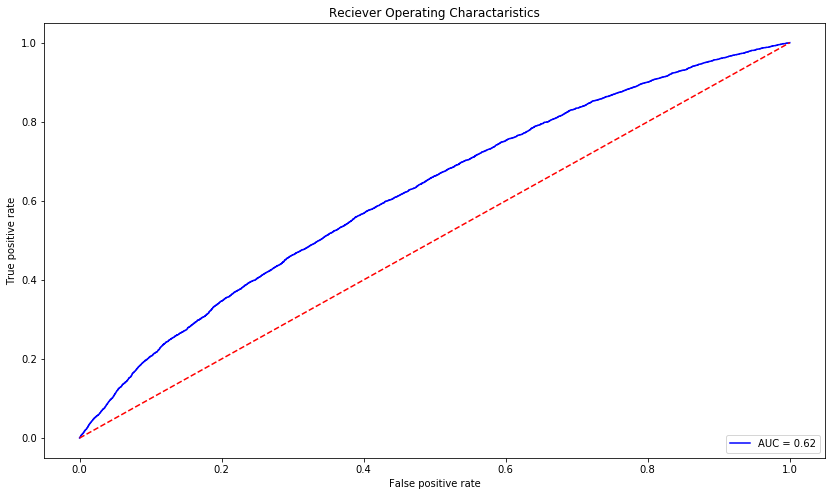

In [83]:
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

## Predict test data

In [88]:
y_pred = pred_test_full/5
submit = pd.DataFrame({'id': test['id'], 'target': y_pred})

In [85]:
x_test.shape

(892816, 112)

In [89]:
submit.to_csv('lr_porto.csv',index=False) 

In [90]:
submit.head()

,id,target
0,0,0.439230
1,1,0.434344
2,2,0.433836
3,3,0.327270
4,4,0.472918


baseline모델로 logistic regression을 사용했으나, 스코어가 0.24612로 높지 않았다. 따라서 Random Forest, XGBoost, LightGBM을 사용하여 우수한 스코어가 나온 최종 모델을 사용했다. (Porto Seguro_LightGBM, RF 모델 비교.ipynb 참고)